# Error-Analysis of Outliers of (ds_ref_base vs ds_ref_paraphrase) and (bs_ref_base vs bs_ref_paraphrase)

In [1]:
# #Mount drive
# from google.colab import drive
# drive.mount('/content/drive')

# FOLDERNAME = 'CS696DS/696ds_project1'
# %cd /content/drive/My\Drive/$FOLDERNAME

In [2]:
# !pip install py-rouge
# !pip install nltk

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import stdev
from scipy.stats import spearmanr
from scipy import stats
import numpy as np
import rouge
from collections import Counter
import nltk
import json
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/pgeorge_umass_edu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
analysis_dict = {}
## HELPER FUNCTIONS
def get_evaluator():
    return rouge.Rouge(metrics=["rouge-n", "rouge-l"], max_n=2, limit_length=False, apply_avg=True, stemming=True, ensure_compatibility=True)
    
def stem(x, evaluator):
    return Counter(evaluator.stem_tokens(evaluator.tokenize_text(x.lower())))

def calc_ds(summ_a, summ_b, summ_comm, evaluator):
    s_a, s_b, s_c = stem(summ_a, evaluator), stem(summ_b, evaluator), stem(summ_comm, evaluator)
    nr = sum((s_a & s_b).values()) + sum((s_a & s_c).values()) + sum((s_b & s_c).values()) - 2.0 * sum((s_a & s_b & s_c).values())
    dr = sum((s_a | s_b | s_c).values())
    return 1.0 - (nr / dr)

def get_centtend_measures(x, y):
    fig, ax1 = plt.subplots(1)
    x = [100*value for value in x]
    y = [100*value for value in y]
    ax1.scatter(x, y)
    return np.mean(y), np.std(y), spearmanr(x,y).statistic, np.corrcoef(x,y)[0,1], fig

def get_count_change(count_1, count_2, sort=True):
    count_1 = {k:0 for k in (count_1 | count_2).keys()} | count_1
    delta = {k:int(count_2[k] - v) for k,v in count_1.items()}
    key_types = set(map(lambda x: type(x), delta.keys()))
    value_types = set(map(lambda x: type(x), delta.values()))
    delta = dict(sorted(delta.items(), key=lambda x: np.abs(x[1]), reverse=True))
    return delta

def perform_analysis(s, p, s_ds, p_ds, s_bs, p_bs, summ_types, reason):
    outlier_dict = {}
    s_a, s_b, s_c = stem(s[0], evaluator), stem(s[1], evaluator), stem(s[2], evaluator)
    s_a_b, s_a_c, s_b_c  = s_a & s_b, s_a & s_c, s_b & s_c
    s_a_b_c = s_a & s_b & s_c
    s_abc = s_a | s_b | s_c

    p_a, p_b, p_c = stem(p[0], evaluator), stem(p[1], evaluator), stem(p[2], evaluator)
    p_a_b, p_a_c, p_b_c, p_a_b_c = p_a & p_b, p_a & p_c, p_b & p_c, p_a & p_b & p_c
    p_a_b_c = p_a & p_b & p_c
    p_abc = p_a | p_b | p_c

    a_b = get_count_change(s_a_b, p_a_b)
    a_c = get_count_change(s_a_c, p_a_c)
    b_c = get_count_change(s_b_c, p_b_c)
    a_b_c = get_count_change(s_a_b_c, p_a_b_c)
    abc = get_count_change(s_abc, p_abc)

    print(f"sum = {sum(a_b.values())}",a_b)
    print(f"sum = {sum(a_c.values())}",a_c)
    print(f"sum = {sum(b_c.values())}",b_c)
    print(f"sum = {-2 * sum(a_b_c.values())}",a_b_c)
    print(f"sum = {sum(abc.values())}",abc)
  
  
    print(f"ds_base = {s_ds} | ds_para = {p_ds}")
    print(f"bs_base = {s_bs} | bs_para = {p_bs}")


    outlier_dict[str(outlier)] = {
      'reason':reason,
      'ds_scores': [s_ds, p_ds],
      'bs_scores': [s_bs, p_bs],
      'a_b': [
          a_b,
          sum(a_b.values()),
      ],
      'a_c': [
          a_c,
          sum(a_c.values()),
      ],
      'b_c': [
          b_c,
          sum(b_c.values()),
      ],
      'a_b_c': [
          a_b_c,
          sum(a_b_c.values()),
      ],
      'abc': [
          abc,
          sum(abc.values()),
      ],
      'sum(s_a_b, s_a_c, s_b_c)': sum(s_a_b.values()) + sum(s_a_c.values()) + sum(s_b_c.values()),
      's_a_b_c': sum(s_a_b_c.values()),
      's_abc': sum(s_abc.values()),

    }
    outlier_dict[str(outlier)].update(
      {summ_types[idx]: [s[idx], p[idx].strip("\n ")] for idx, summ in enumerate(s)}
    )
    print(json.dumps(outlier_dict, indent=1))
    return(outlier_dict)

valid_paraphrase_examples = [ 3  4  9 13 19 26 28 29 30 33 36 37 39 40 42 47]
len(valid_paraphrase_examples) = 16
[9]
[39]
[9]
sum = 3 {',': 6, 'be': 4, 'at': -2, 'the': 2, 'hotel': -2, 'can': 2, 'is': 1, 'a': -1, 'to': 1, 'you': -1, 'there': -1, 'of': 1, 'but': -1, 'some': -1, 'room': -1, 'clean': -1, 'adequ': -1, 'take': -1, 'get': -1, 'are': -1, 'do': -1, 'which': -1, 'other': -1, 'as': -1, 'that': -1, 'overlook': -1, 'an': 1, 'few': 1, 'attract': 1, 'for': 1, 'was': 1, 'mani': 1, 'offer': 1, 'thi': 0, 'stai': 0, 'and': 0, '.': 0, 'close': 0, 'with': 0, 'staff': 0, 'veri': 0, 'help': 0, 'pool': 0}
sum = 0 {'.': -1, 'the': -1, 'an': 1, 'close': 1}
sum = 0 {'the': -1, '.': -1, 'close': 1, 'an': 1}
sum = 0 {'.': -1, 'the': -1, 'an': 1, 'close': 1}
sum = -6 {'a': -5, ',': 5, 'the': -4, 'can': 4, 'was': -3, '.': -2, 'there': -2, 'here': -2, 'at': -2, 'hotel': -2, 'nearbi': -2, 'food': -2, 'has': -2, 'if': -2, 'in': 2, 'attract': 2, 'guest': 2, 'who': 2, 'is': 1, 'decent': -1, 'place': 1,

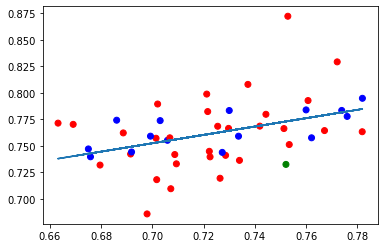

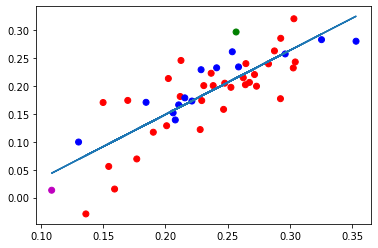

In [5]:
## READ DATAFRAMES
ds_ref_base = pd.read_csv("data/results/ds_ref_base.csv")
ds_ref_para = pd.read_csv("data/results/ds_ref_paraphrase.csv")
bs_ref_base = pd.read_csv("data/results/bs_ref_base.csv")
bs_ref_para = pd.read_csv("data/results/bs_ref_paraphrase.csv")
valid_paraphrase_examples = {}
# display(ds_ref_base.columns)
# print(ds_ref_base.loc[1]['summ_a'])

## IDENTIFY VALID SUMMARIES PROGRAMMATICALLY
validity = []
for i in range(0, len(ds_ref_base)):
    # print()
    # print(f"Example {i}")
    summ_types = ['summ_a', 'summ_b', 'summ_comm']
    for summ_type in summ_types:
        # print(f"Summ = {summ_type}")
        original_summ = ds_ref_base.loc[i][summ_type].strip(" \n")
        paraphrase_summ = ds_ref_para.loc[i][summ_type].strip(" \n")
        if original_summ[-1] == '.' and paraphrase_summ[-1] != '.':
            # print(f"invalid summ_type = {summ_type}")
            # print(f"ORIG = {original_summ[-100:]}")
            # print(f"PARA = {paraphrase_summ[-100:]}")
            validity.append(False)
            break

    if len(validity) == i:
        # print("Summary was valid")
        validity.append(True)
        original_summ = ds_ref_base.loc[i]['summ_comm'].strip(" \n")
        paraphrase_summ = ds_ref_para.loc[i]['summ_comm'].strip(" \n")
        # print(f"ORIG = {original_summ[-100:]}")
        # print(f"PARA = {paraphrase_summ[-100:]}")

        # print(f"length(valid) = {len(validity)}")


# Analyzed examples which were programmatically marked as invalid, and verified
# that they were complete
manually_verified_paraphrases = [9, 19, 33, 37, 47]
rule_verified_examples = np.where(np.array(validity)==1)[0].astype(np.int64).tolist()

## CREATE VALID PARAPHRASE DATA
valid_paraphrase_examples = manually_verified_paraphrases + rule_verified_examples
valid_paraphrase_examples = np.array(sorted(valid_paraphrase_examples, reverse=False))
print(f"valid_paraphrase_examples = {valid_paraphrase_examples}")
print(f"len(valid_paraphrase_examples) = {len(valid_paraphrase_examples)}")


## SET HYPERPARAMETERS
NUM_OUTLIERS = 1

## IDENTIFY DS OUTLIERS NOT PRESENT IN BS BASED ON DISTANCE ALONE

x = np.array(ds_ref_base['ds_score'])
y = np.array(ds_ref_para['ds_score'])
m, c = np.polyfit(x, y, 1)
invalid_mask = np.ones(x.shape, bool)
invalid_mask[valid_paraphrase_examples] = False
dists = np.abs(y - m * x - c)/np.sqrt(1 + m ** 2)
dists[invalid_mask] = 0
# print(dists)

ds_outliers = np.argsort(-dists)[:NUM_OUTLIERS]
print(ds_outliers)

## PLOT DS(orig, para) with colors 'red' = invalid examples, 
# 'blue' = valid_examples, 'green' = valid example outliers
fig, ax = plt.subplots(1)
colors = np.array(['r']*48)
colors[valid_paraphrase_examples] = 'b'
colors[ds_outliers] = 'g'
ax.scatter(x, y, color=colors)
ax.plot(x, m*x+c)

## PLOT BS(orig, para) with colors 'red' = invalid examples, 
# 'blue' = valid_examples, 'green' = valid example outliers
# as obtained from the DS regression model
x = np.array(bs_ref_base['bs_score'])
y = np.array(bs_ref_para['bs_score'])
m, c = np.polyfit(x, y, 1)
invalid_mask = np.ones(x.shape, bool)
invalid_mask[valid_paraphrase_examples] = False
dists = np.abs(y - m * x - c)/np.sqrt(1 + m ** 2)
dists[invalid_mask] = 0
# print(dists)

bs_outliers = np.argsort(-dists)[:NUM_OUTLIERS]
print(bs_outliers)

# outliers which are present in DS but not BS
exc_outliers = np.setdiff1d(ds_outliers, bs_outliers)
print(exc_outliers)

# Purple in BS graph means an outlier from the DS graph
fig, ax = plt.subplots(1)
colors = np.array(['r']*48)
colors[valid_paraphrase_examples] = 'b'
colors[bs_outliers] = 'g'
colors[ds_outliers] = 'c'
colors[exc_outliers] = 'm'
ax.scatter(x, y, color=colors)
ax.plot(x, m*x+c)

# Initialize dict to hold the error analysis examples
evaluator = get_evaluator()

# ANALYZE EXCLUSIVE DS OUTLIERS
for outlier in exc_outliers:
    s_ds = ds_ref_base.loc[outlier]['ds_score']
    p_ds = ds_ref_para.loc[outlier]['ds_score']
    s_bs = bs_ref_base.loc[outlier]['bs_score']
    p_bs = bs_ref_para.loc[outlier]['bs_score']
    summ_types = ['summ_a', 'summ_b', 'summ_comm']
    s, p = [], []
    for summ_type in summ_types:
        s.append(ds_ref_base.loc[outlier][summ_type])
        p.append(ds_ref_para.loc[outlier][summ_type])

    outlier_dict = perform_analysis(s, p, s_ds, p_ds, s_bs, p_bs, summ_types, 'Was outlier in scatter(ds_orig, ds_para) but not scatter(bs_orig, bs_para)')
    analysis_dict.update(outlier_dict)  

## ANALYZE DS(orig, paraphrase) pairs with unusual differences


In [6]:
# HYPERPARAMETERS
SIG_LEVEL = 0.01
NUM_EXAMPLES = 2

# CALCULATE differences
x = ds_ref_base['ds_score'].values*100
y = ds_ref_para['ds_score'].values*100
diffs = y - x
sample_mean = 0.0
sample_std = np.std(diffs, ddof=1)

# Calculate t scores and set t scores of invalid examples to 0
# Also set t_scores < t_critical to 0 since they don't feature in our 
# calculation anymore
# and sort in descending order of aboslute values
t_scores = (diffs - sample_mean) / (sample_std / np.sqrt(diffs.shape[0]))
invalid_mask = np.ones(diffs.shape, bool)
invalid_mask[valid_paraphrase_examples] = False
t_scores[invalid_mask] = 0
t_critical = stats.t.ppf(q=1-SIG_LEVEL/2,df=x.shape[0]-1)
t_scores[np.abs(t_scores)<=t_critical] = 0
diff_outliers = np.argsort(- np.abs(t_scores))[:NUM_EXAMPLES]
print(diff_outliers)
print(diff_outliers.shape[0])

## ANALYZE DS(orig, paraphrase) pairs with unusual differences
for outlier in diff_outliers:
    s_ds = ds_ref_base.loc[outlier]['ds_score']
    p_ds = ds_ref_para.loc[outlier]['ds_score']
    s_bs = bs_ref_base.loc[outlier]['bs_score']
    p_bs = bs_ref_para.loc[outlier]['bs_score']
    summ_types = ['summ_a', 'summ_b', 'summ_comm']
    s, p = [], []
    for summ_type in summ_types:
        s.append(ds_ref_base.loc[outlier][summ_type])
        p.append(ds_ref_para.loc[outlier][summ_type])

    outlier_dict = perform_analysis(s, p, s_ds, p_ds, s_bs, p_bs, summ_types, 'Was outlier w.r.t other examples in terms of diff = (DS_para - DS_original)')
    analysis_dict.update(outlier_dict)  




[29 26]
2
sum = -14 {'is': -3, 'the': -3, 'hotel': -3, ',': 3, 'a': -2, '.': -2, 'realli': -2, 'for': 1, 'and': -1, 'make': -1, 'you': -1, 'to': 1, 'safe': -1, 'good': -1, 'of': 1, 'staff': -1, 'help': -1, 'with': -1, 'can': -1, 'complimentari': -1, 'from': -1, 'there': -1, 'which': -1, 'place': 1, 'brief': 1, 'stai': 1, 'it': 1, 'locat': 1, 'citi': 1, 'have': 1, 'an': 1, 'thi': 0, 'room': 0, 'are': 0, 'at': 0}
sum = -4 {'is': -1, 'want': -1, 'some': -1, 'of': 1, 'staff': -1, 'help': -1, 'at': -1, ',': 1, 'a': 0, 'you': 0, 'to': 0, '.': 0, 'the': 0, 'hotel': 0, 'there': 0}
sum = -4 {'is': -1, 'there': -1, 'of': 1, 'you': -1, 'staff': -1, 'a': -1, 'at': -1, 'help': -1, ',': 1, "'s": 1, 'the': 0, 'hotel': 0, '.': 0, 'to': 0, 'be': 0}
sum = 10 {'is': -1, 'a': -1, 'you': -1, 'of': 1, 'staff': -1, 'help': -1, 'at': -1, 'there': -1, ',': 1, 'to': 0, '.': 0, 'the': 0, 'hotel': 0}
sum = 14 {',': 4, '.': -3, 'hotel': -3, 'be': 3, 'a': -2, 'realli': -2, 'by': -2, 'was': -2, 'within': 2, 'thi': -

In [7]:
# WRITE ANALYSIS DICT TO FILE
json.dump(analysis_dict, open("data/results/error_analysis_ds_bs.json",'w'))

In [8]:
print(np.mean(ds_ref_base['ds_score']))
print(np.mean(ds_ref_para['ds_score']))

0.7240833382698066
0.7619346694701926
